In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [2]:
# url = 'https://www.amazon.in/AmazonBasics-Mid-Back-Office-Chair-Brown/product-reviews/B0735WMNT5/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
reviewlist = []

In [3]:
def get_soup(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})

    try:

        for item in reviews:
            review = {
                "product":
                soup.title.text.replace('Amazon.in:Customer reviews:',
                                        "").strip(),
                "title":
                item.find('a', {
                    'data-hook': 'review-title'
                }).text.strip(),
                "rating":
                item.find('i', {
                    'data-hook': 'review-star-rating'
                }).text.replace('out of 5 stars', '').strip(),
                "body":
                item.find('span', {
                    'data-hook': 'review-body'
                }).text.strip()
            }
            reviewlist.append(review)

    except:

        Pass

In [5]:
for x in range(1, 25):
    soup = get_soup(
    f'https://www.amazon.in/AmazonBasics-Mid-Back-Office-Chair-Brown/product-reviews/B0735WMNT5/ref=cm_cr_getr_d_paging_btm_next_501?ie=UTF8&reviewerType=all_reviews&pageNumber={x}'
    )
    get_reviews(soup)
    print(f'Getting the page : {x}')
    print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break
df = pd.DataFrame(reviewlist)
df.to_excel('offChairReview.xlsx', index=False)
print('\n\nfinish')

Getting the page : 1
10
Getting the page : 2
20
Getting the page : 3
30
Getting the page : 4
40
Getting the page : 5
50
Getting the page : 6
50
Getting the page : 7
60
Getting the page : 8
70
Getting the page : 9
70
Getting the page : 10
80
Getting the page : 11
90
Getting the page : 12
100
Getting the page : 13
100
Getting the page : 14
110
Getting the page : 15
120
Getting the page : 16
130
Getting the page : 17
140
Getting the page : 18
140
Getting the page : 19
150
Getting the page : 20
160
Getting the page : 21
170
Getting the page : 22
170
Getting the page : 23
180
Getting the page : 24
190


finish


In [6]:
rawData = pd.read_excel('offChairReview.xlsx')
rawData.head()

,product,title,rating,body
0,AmazonBasics Faux Leather Mid-Back Office Chai...,Non-reclining back support,1.0,The char does not have reclining back support....
1,AmazonBasics Faux Leather Mid-Back Office Chai...,Questionable quality!,2.0,"With just year's use, you can see the state of..."
2,AmazonBasics Faux Leather Mid-Back Office Chai...,Good office chair from Amazon.,5.0,Its been 2months and I regularly use it. Comfo...
3,AmazonBasics Faux Leather Mid-Back Office Chai...,"Bad cushion, Rests only till Chest level, Unhappy",1.0,"My feedback after used it for two days,1. Very..."
4,AmazonBasics Faux Leather Mid-Back Office Chai...,"Perfect chair, value for money",5.0,I am writing this after using it for three wee...


In [7]:
str(rawData.body.loc[86])

'Chair is no doubt fantastic and i am in love with it ❤️But had to assemble it myself as that guy assigned never showed up.'

In [8]:
import re
import string
import spacy
from nltk import tokenize

In [9]:
re.findall('\s\W', 'love with it ❤️But had to assemble')

[' ❤']

In [10]:
ascii('❤️')

"'\\u2764\\ufe0f'"

In [11]:
re.findall('\B\W', 'love with it ❤️But had to assemble')

['❤', '️']

In [12]:
re.sub('\W', '-', "love's with it ❤️But had to assemble")

'love-s-with-it---But-had-to-assemble'

In [13]:
re.sub('-+', ' ', 'love-s-with-it---But-had-to-assemble')

'love s with it But had to assemble'

In [14]:
sentences = []
for txt in rawData['title']:
    sentences.append(tokenize.line_tokenize(str(txt)))
sentences[0:15]

[['Non-reclining back support'],
 ['Questionable quality!'],
 ['Good office chair from Amazon.'],
 ['Bad cushion, Rests only till Chest level, Unhappy'],
 ['Perfect chair, value for money'],
 ['Looks Good but Seat not soft'],
 ['When you need to work for long hours, you need a comfortable chair'],
 ['Poor Quality better buy some other brand'],
 ['A Nice Economic Study / Office Chair'],
 ['Good build quality and comfortable!'],
 ["It's the best in this price range."],
 ['Sturdy, Comfortable, Light Weight'],
 ['Absolute nonsense for this ridiculously high price chair'],
 ['Great Value for Money'],
 ['Uncomfortable, thin cushion']]

In [15]:
len(sentences)

190

In [16]:
sent_df = pd.DataFrame(sentences, columns=['title'])
sent_df.head()

,title
0,Non-reclining back support
1,Questionable quality!
2,Good office chair from Amazon.
3,"Bad cushion, Rests only till Chest level, Unhappy"
4,"Perfect chair, value for money"


In [17]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [18]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
print(affinity_scores)

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [19]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores


def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [20]:
sent_df['sentiment_value'] = sent_df['title'].apply(calculate_sentiment)
sent_df.head()

,title,sentiment_value
0,Non-reclining back support,2
1,Questionable quality!,-2
2,Good office chair from Amazon.,3
3,"Bad cushion, Rests only till Chest level, Unhappy",-3
4,"Perfect chair, value for money",3


In [21]:
sent_df['word_count'] = sent_df['title'].str.split().apply(len)
sent_df['word_count'].head(10)

0     3
1     2
2     5
3     8
4     5
5     6
6    13
7     7
8     7
9     5
Name: word_count, dtype: int64

In [22]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    190.000000
mean       1.236842
std        2.182594
min       -5.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        7.000000
Name: sentiment_value, dtype: float64

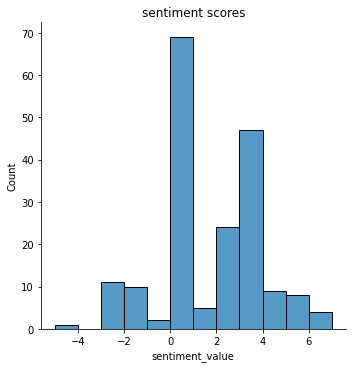

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(sent_df['sentiment_value'])
plt.title('sentiment scores')
plt.show()

In [30]:
sent_df.groupby('sentiment_value').count()

,title,word_count
sentiment_value,,
-5,1,1
-3,11,11
-2,10,10
-1,2,2
0,69,69
1,5,5
2,24,24
3,47,47
4,9,9


Text(0.5, 0, 'Reviews in the order of index')

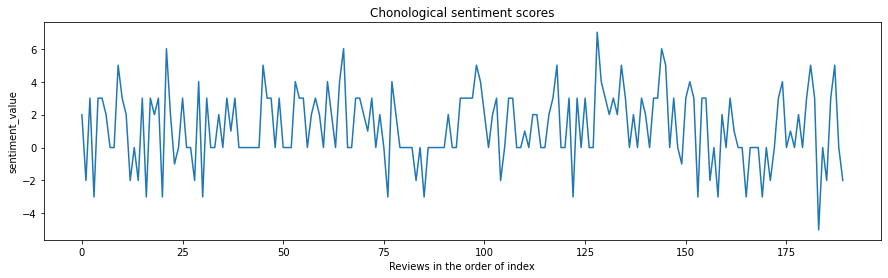

In [26]:
plt.figure(figsize=(15, 4))
sns.lineplot(x=sent_df.index, y=sent_df['sentiment_value'])
plt.title('Chonological sentiment scores')
plt.xlabel('Reviews in the order of index')

**Out of 190 reviews 69 are neutral and 24 show negative emotion/sentiment rest of 97 reviews show positive emotion/sentiment.**